In [98]:
%load_ext autoreload
%autoreload 2

# Add parent directory to system path
import os, sys
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [99]:
from graph import graph_db
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from matplotlib import pyplot as plt
import analysis.visualisation as visualisation

In [100]:
with graph_db.open("../data/graph.db") as db:
    df = db.as_dataframe()

In [101]:
df_backup = df.copy()

In [102]:
df['experiment_name'].unique()

array(['2024-05-10a', 'small_solveable', 'medium_random_1'], dtype=object)

In [103]:
df = df[df.experiment_name == 'medium_random_1'].copy()

In [104]:
df.solution_method

702                  Greedy Solver
703                  Greedy Solver
704                 Genetic Solver
705                 Genetic Solver
706                  Greedy Solver
                   ...            
2838                 Greedy Solver
2839                 Greedy Solver
2840                 Greedy Solver
2841                 Greedy Solver
2842    Simulated Annealing Solver
Name: solution_method, Length: 2141, dtype: object

In [105]:
df.loc[(df.solution_method == 'Simulated Annealing Solver') & (df.solver_parameters_annealing_schedule == 'adaptive'), 'method_full_name'] = 'Simulated Annealing (adaptive)' 
df.loc[(df.solution_method == 'Simulated Annealing Solver') & (df.solver_parameters_annealing_schedule == 'exponential'), 'method_full_name'] = 'Simulated Annealing (exponential)' 
df.loc[(df.solution_method != 'Simulated Annealing Solver'), 'method_full_name'] = df.solution_method

/var/folders/xm/ytd6ktbs0_n7mq72_0yz20pr0000gn/T/ipykernel_25489/2276348463.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Simulated Annealing (adaptive)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[(df.solution_method == 'Simulated Annealing Solver') & (df.solver_parameters_annealing_schedule == 'adaptive'), 'method_full_name'] = 'Simulated Annealing (adaptive)'


In [106]:
df.method_full_name

702                         Greedy Solver
703                         Greedy Solver
704                        Genetic Solver
705                        Genetic Solver
706                         Greedy Solver
                      ...                
2838                        Greedy Solver
2839                        Greedy Solver
2840                        Greedy Solver
2841                        Greedy Solver
2842    Simulated Annealing (exponential)
Name: method_full_name, Length: 2141, dtype: object

In [114]:
#df['rank'] = df.groupby('problem_id', as_index=False)['solution_aspl'].transform('rank')

In [109]:
df['solution_aspl'] = df['solution_aspl'].round(1)
df['rank'] = df.groupby('problem_id')['solution_aspl'].rank(method='min', ascending=True)

In [110]:
df[['problem_id', 'method_full_name', 'rank','solution_aspl']]

,problem_id,method_full_name,rank,solution_aspl
702,102,Greedy Solver,1.0,26626.8
703,102,Greedy Solver,1.0,26626.8
704,103,Genetic Solver,1.0,5886.2
705,103,Genetic Solver,1.0,5886.2
706,103,Greedy Solver,1.0,5886.2
...,...,...,...,...
2838,465,Greedy Solver,1.0,1471.1
2839,465,Greedy Solver,1.0,1471.1
2840,466,Greedy Solver,1.0,2171.3
2841,466,Greedy Solver,1.0,2171.3


In [111]:
df[df.method_full_name == 'Exhaustive Solver'][['problem_id','rank']]

,problem_id,rank


In [112]:
df.query('problem_id == 101')[['problem_id', 'method_full_name', 'solution_aspl']]

,problem_id,method_full_name,solution_aspl


<Axes: xlabel='rank', ylabel='Count'>

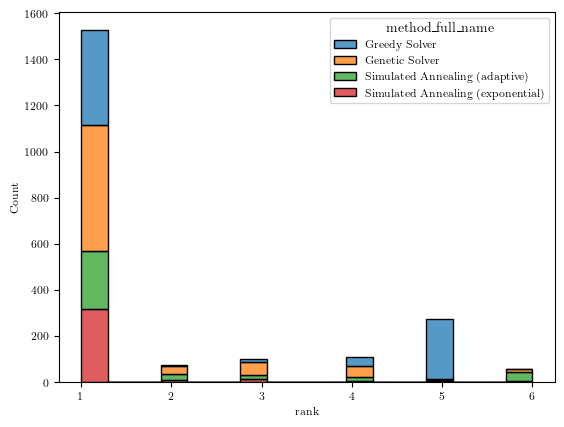

In [113]:
sns.histplot(df, x='rank', hue='method_full_name', multiple='stack')

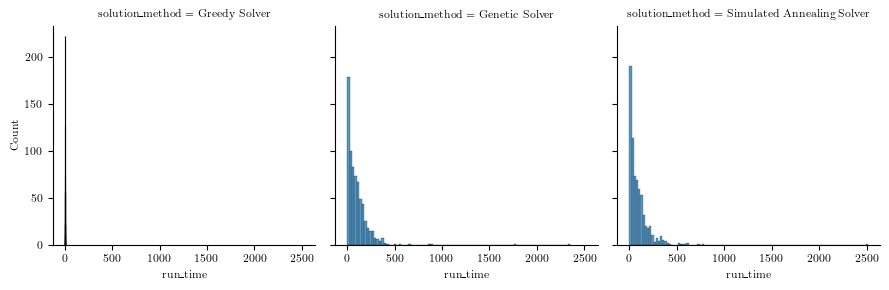

In [120]:
sns.FacetGrid(data=df, col='solution_method').map(sns.histplot, 'run_time')
#sns.histplot(df[['run_time','solution_method']], x="run_time", hue="solution_method")

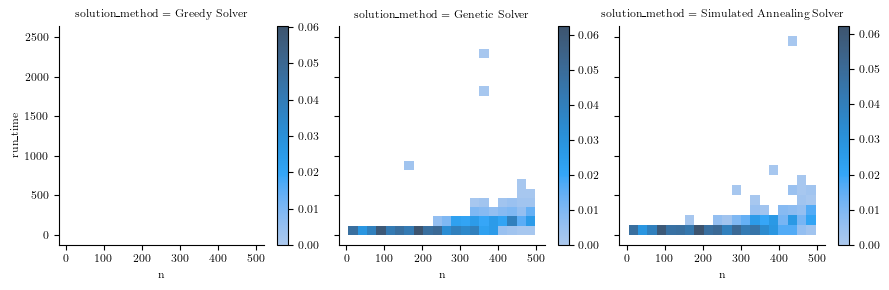

In [148]:
g = sns.FacetGrid(data=df, col='solution_method').map(sns.histplot, 'n', 'run_time', stat='probability', bins=(20,20), cbar=True, common_bins=True, common_norm=False)

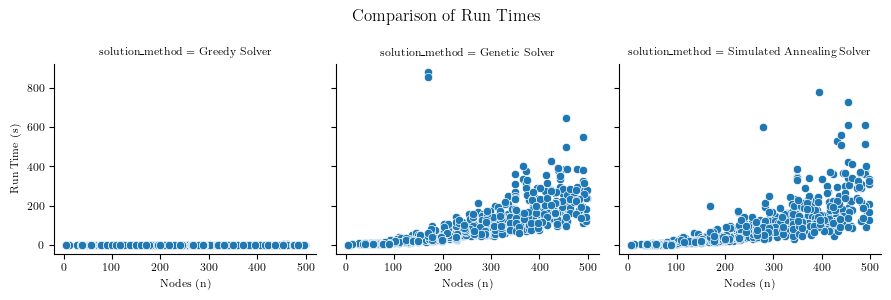

In [161]:
df_times = df.query('run_time < 1000')
g = sns.FacetGrid(data=df_times, col='solution_method').map(sns.scatterplot, 'n', 'run_time')
g.set_axis_labels("Nodes (n)","Run Time (s)")
g.figure.suptitle("Comparison of Algorithm Run Times", size=12)
g.figure.subplots_adjust(top=.8)

In [162]:
# Construct a contingency table
contingency_table = pd.crosstab(index=df['method_full_name'], columns=df['rank'].astype(int), normalize='index')


Text(0.5, 1.0, 'Rank Distribution of Methods - Experiment 2')

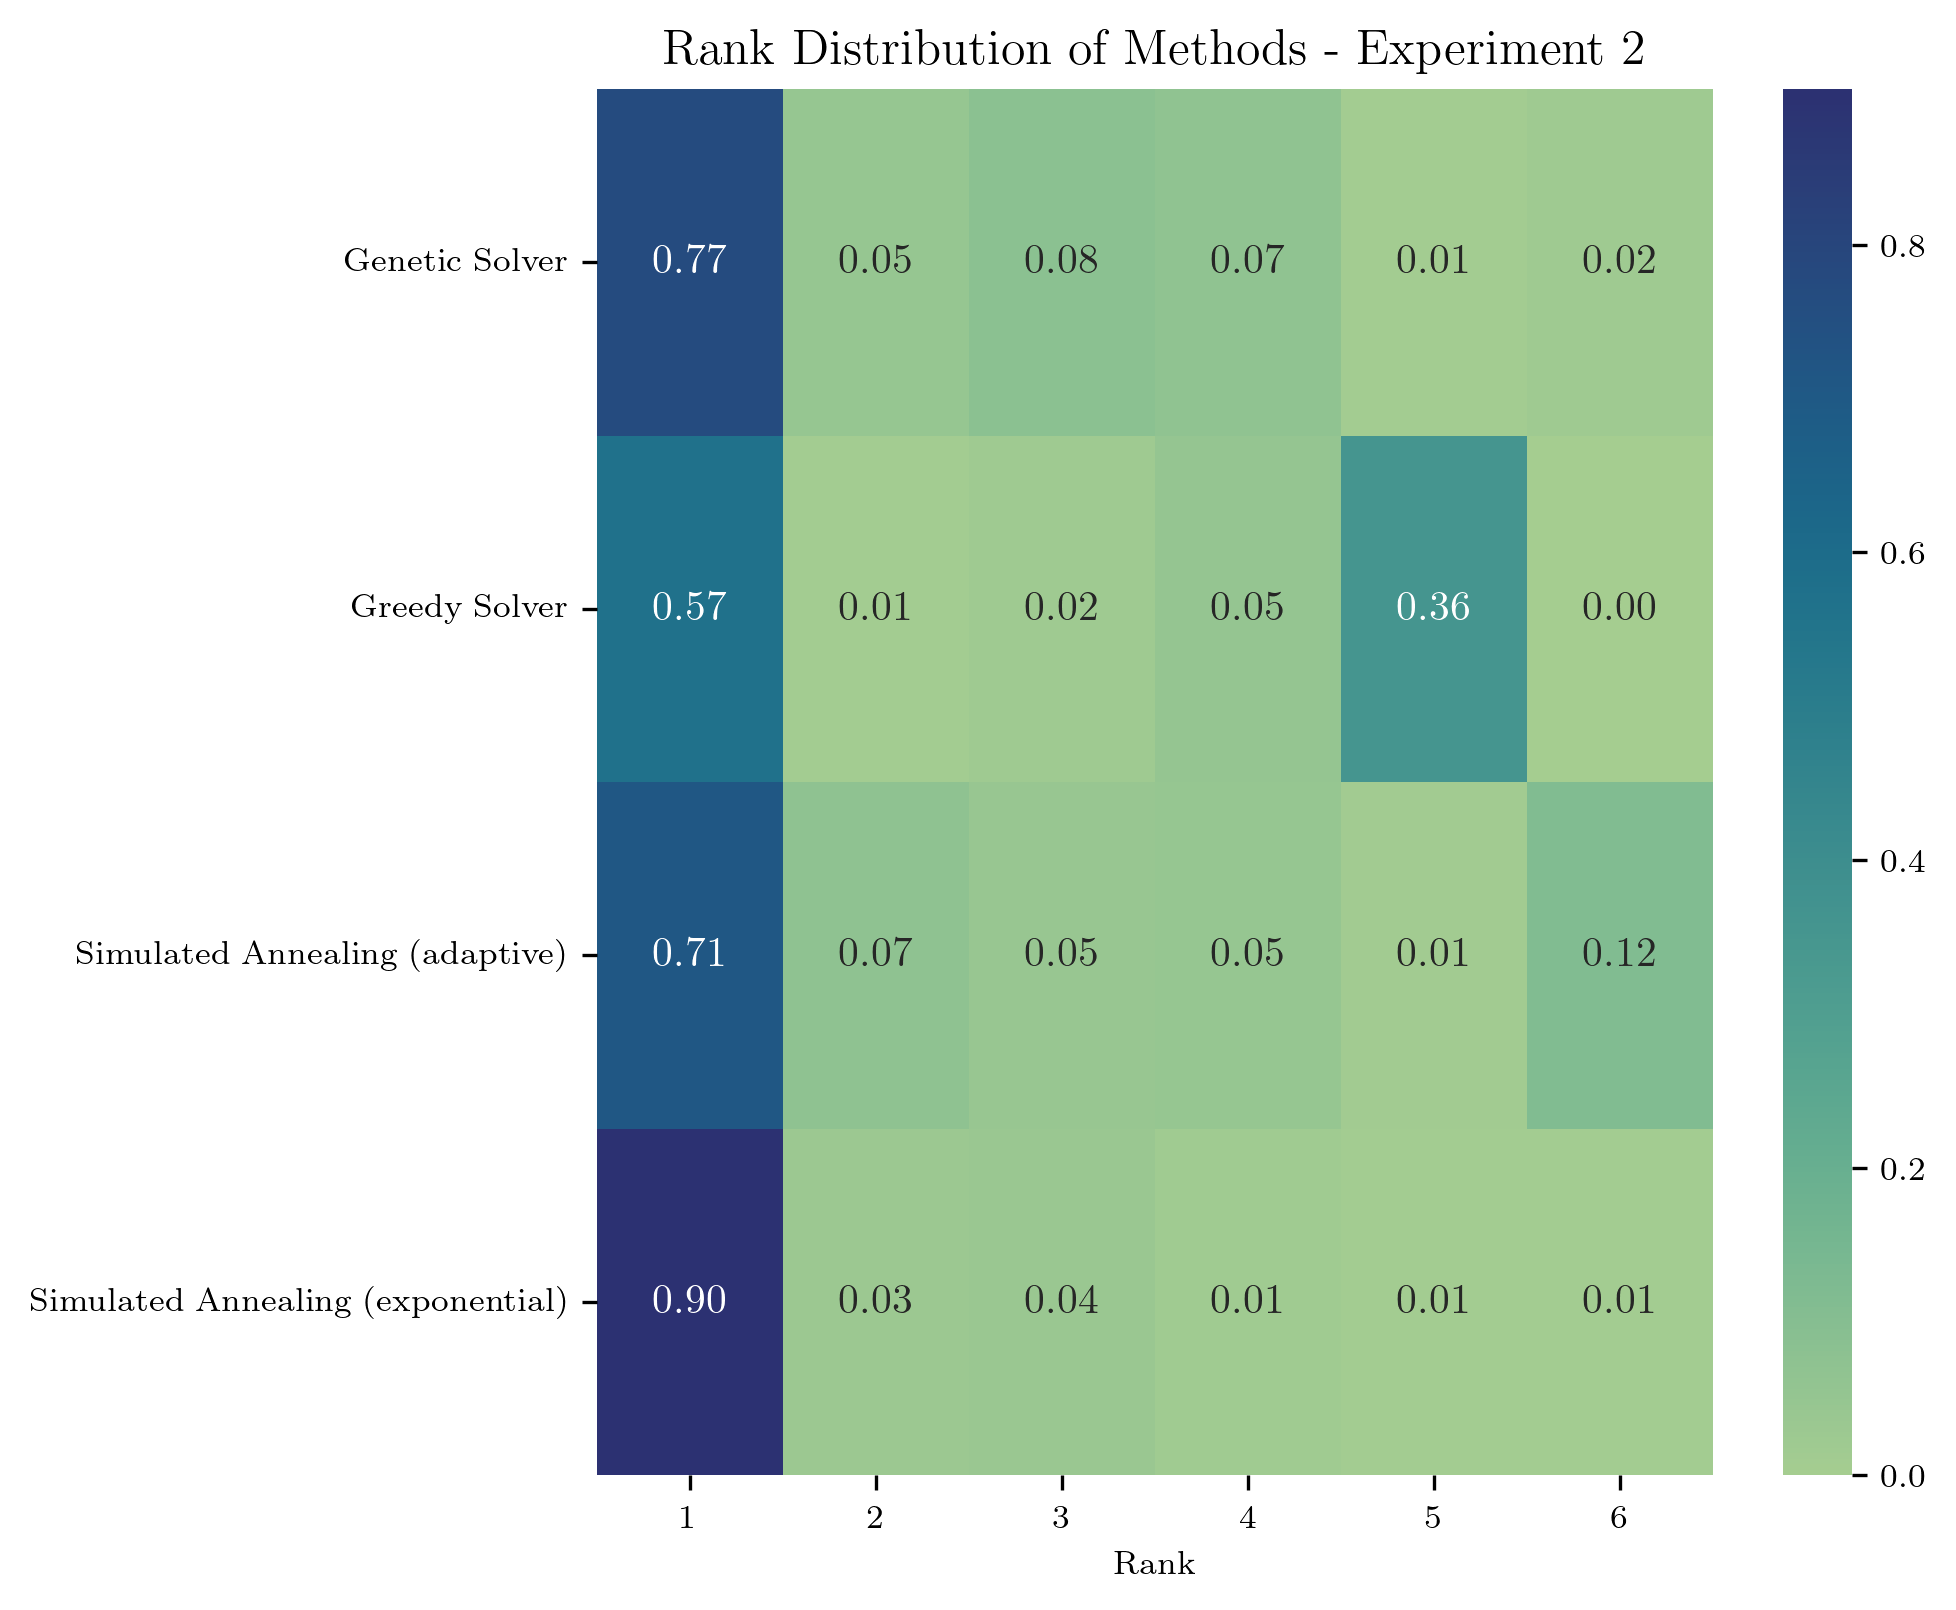

In [163]:
fig, ax = plt.subplots(1, 1, figsize = (6, 6), dpi=300)
sns.heatmap(contingency_table, cmap="crest", annot=True, fmt=".2f", cbar=True)
ax.set_xlabel('Rank')
ax.set_ylabel(None)
ax.set_title('Rank Distribution of Methods - Experiment 2')

In [203]:
df.columns

Index(['graph_id', 'experiment_name', 'description', 'graph_aspl', 'n', 'm',
       'name', 'graph_class', 'generation_method', 'generation_parameters',
       'problem_id', 'k', 'degree_s', 'generation_method', 'solution_aspl',
       'run_time', 'is_optimal', 'solution_method', 'solver_parameters',
       'iterations', 'is_optimal', 'termination_reason',
       'generation_parameters_n', 'generation_parameters_p',
       'generation_parameters_k', 'generation_parameters_m',
       'generation_parameters_d', 'solver_parameters_verbose',
       'solver_parameters_maximum_iterations',
       'solver_parameters_maximum_time', 'solver_parameters_patience',
       'solver_parameters_min_delta', 'solver_parameters_repititions',
       'solver_parameters_aspl_lower_bound', 'solver_parameters_method_name',
       'solver_parameters_early_stopping', 'solver_parameters_population_size',
       'solver_parameters_gene_mutation_rate',
       'solver_parameters_creature_mutation_rate',
       'sol

In [80]:
# Pivot the DF to have the ASPL as the value and the method_full_name as column name, along with problem_id as the index
df['problem_id'] = df['problem_id'].astype(int)
df['m'] = df['m'].astype(int)
df['n'] = df['n'].astype(int)
df_pivot = df.pivot_table(index='problem_id', columns='method_full_name', values='solution_aspl')
df_pivot = df_pivot.dropna(axis=0, inplace=False)

In [14]:
df_pivot.head(10)

method_full_name,Exhaustive Solver,Genetic Solver,Greedy Solver,Simulated Annealing (adaptive),Simulated Annealing (exponential)
problem_id,,,,,
2,2269.449161,2270.203735,2270.958246,2269.449161,2269.449161
3,2353.937519,2353.937500,2353.937519,2353.937519,2353.937519
4,4870.820168,4870.893799,4870.820168,4870.820168,4870.820168
5,29110.281481,29546.424805,30418.587654,29552.997531,29110.281481
6,37338.050518,38620.753906,37338.050518,37437.797101,37437.797101
7,4722.142379,4722.142578,4722.142379,4722.142857,4722.142379
8,2341.139527,2341.724854,2342.310023,2341.139527,2341.139527
9,2422.239028,2422.239014,2422.425549,2422.239028,2422.239028
10,24994.482051,24994.482422,24994.482051,24994.482051,24994.482051


In [17]:
df_pivot.columns

Index(['Exhaustive Solver', 'Genetic Solver', 'Greedy Solver',
       'Simulated Annealing (adaptive)', 'Simulated Annealing (exponential)'],
      dtype='object', name='method_full_name')

In [81]:
df_pivot.columns = ['Exhaustive', 'GA', 'Greedy Solver',
       'SA (Adaptive)', 'SA (Exponential)']

In [82]:
# Perform the Friedman test

statistic, p_value = stats.friedmanchisquare(*[df_pivot[col] for col in df_pivot.columns])

# Print the results
print("Friedman test:")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")


Friedman test:
Statistic: 116.06896551724148
P-value: 3.6902020031367634e-24


In [83]:
import scikit_posthocs as sp
import numpy as np

# Perform the Nemenyi post-hoc test
posthoc_results = sp.posthoc_nemenyi_friedman(df_pivot)

Text(0.5, 1.0, 'Nemenyi Post-Hoc Test')

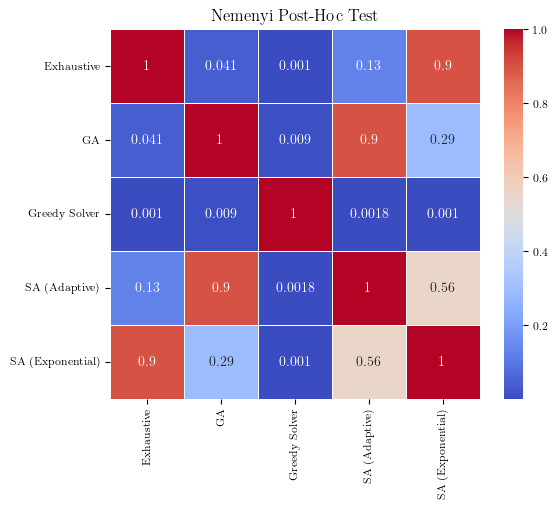

In [84]:
sns.heatmap(posthoc_results, annot=True, cmap='coolwarm', linewidths=0.5, square=True)
plt.title("Nemenyi Post-Hoc Test")


In [85]:
rank_df = df_pivot.rank(axis=1, method='dense', ascending=True)

In [86]:
rank_df.mean()

Exhaustive          1.00
GA                  1.35
Greedy Solver       1.85
SA (Adaptive)       1.36
SA (Exponential)    1.12
dtype: float64

In [129]:
df_pivot

method_full_name,Genetic Solver,Greedy Solver,Monte Carlo Solver,Simulated Annealing (exponential)
problem_id,,,,
752.0,5815.41,5815.41,5890.68,5815.41
753.0,5658.07,5658.07,5782.96,5658.07
754.0,2604.69,2604.69,2664.11,2604.69
755.0,4298.46,4298.46,4298.46,4298.46
756.0,24507.53,24507.53,25387.17,24507.53
757.0,24101.93,24274.11,24936.81,24274.11
758.0,5446.54,5495.48,5644.32,5446.54
759.0,5835.24,5835.24,5904.45,5835.24
761.0,68679.91,72787.28,73550.15,68020.18


In [87]:
def scale_row(row):
    row_mean = row.mean()
    row_std = row.std()
    return (row - row_mean) / row_std

# Apply the scaling function to each row
scaled_df = df_pivot.apply(scale_row, axis=1, result_type='expand')

<Axes: ylabel='Density'>

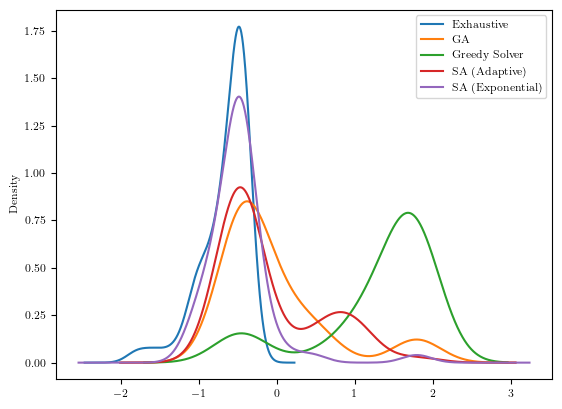

In [88]:
scaled_df.plot.kde()

## Signed Wilcoxon Test

In [96]:
import pandas as pd
from scipy.stats import wilcoxon

# Assuming your dataframe is named 'df' and has columns for each algorithm's ASPL
# Example column names: 'Benchmark_ASPL', 'Algorithm1_ASPL', 'Algorithm2_ASPL', ...

# Specify the benchmark algorithm column
benchmark_column = 'Greedy Solver'

# Perform Wilcoxon Signed Rank test for each algorithm against the benchmark
for column in df_pivot.columns:
    if column != benchmark_column:
        # Get the ASPL values for the benchmark and the current algorithm
        benchmark_aspl = df_pivot[benchmark_column]
        algorithm_aspl = df_pivot[column]
        
        # Perform Wilcoxon Signed Rank test
        statistic, p_value = wilcoxon(benchmark_aspl, algorithm_aspl)
        
        # Extract the algorithm name from the column name
        algorithm_name = column
        
        # Print the results
        print(f"Wilcoxon Signed Rank test - {algorithm_name} vs Benchmark:")
        print(f"  Statistic: {statistic}")
        print(f"  P-value: {p_value}")
        print()

Wilcoxon Signed Rank test - Exhaustive vs Benchmark:
  Statistic: 0.0
  P-value: 3.5229504763988177e-09

Wilcoxon Signed Rank test - GA vs Benchmark:
  Statistic: 78.0
  P-value: 1.0559122734362712e-07

Wilcoxon Signed Rank test - SA (Adaptive) vs Benchmark:
  Statistic: 79.0
  P-value: 1.205082391603035e-06

Wilcoxon Signed Rank test - SA (Exponential) vs Benchmark:
  Statistic: 44.0
  P-value: 3.7397075095136214e-08



In [25]:
from itertools import combinations

def pairwise_function(col1, col2):
    count = (col1 < col2).sum()
    total = len(col1)
    percentage = (count / total) * 100
    return percentage

# Get the column names
columns = df_pivot.columns

# Generate pairwise combinations of columns
pairwise_combinations = list(combinations(columns, 2))

pairwise_results = {}
for col1, col2 in pairwise_combinations:
    pairwise_results[(col1, col2)] = pairwise_function(df_pivot[col1], df_pivot[col2])
    pairwise_results[(col2, col1)] = pairwise_function(df_pivot[col2], df_pivot[col1])

pairwise_df = pd.DataFrame(pairwise_results, index=columns, columns=columns)

# Fill the diagonal with 0 (comparing a column to itself)
for col in columns:
    pairwise_df.loc[col, col] = 0

# Create a heatmap using seaborn
#plt.figure(figsize=(8, 6))
#sns.heatmap(pairwise_df, annot=True, cmap='coolwarm', cbar_kws={'label': 'Percentage'})
#plt.title('Percentage of Times Column 1 is Smaller than Column 2')
#plt.show()

In [26]:
results_df = pd.DataFrame.from_dict(pairwise_results, orient='keys')

ValueError: Expected 'index', 'columns' or 'tight' for orient parameter. Got 'keys' instead

In [96]:
pairwise_combinations

[('Genetic Solver', 'Greedy Solver'),
 ('Genetic Solver', 'Monte Carlo Solver'),
 ('Genetic Solver', 'Simulated Annealing (adaptive)'),
 ('Genetic Solver', 'Simulated Annealing (exponential)'),
 ('Greedy Solver', 'Monte Carlo Solver'),
 ('Greedy Solver', 'Simulated Annealing (adaptive)'),
 ('Greedy Solver', 'Simulated Annealing (exponential)'),
 ('Monte Carlo Solver', 'Simulated Annealing (adaptive)'),
 ('Monte Carlo Solver', 'Simulated Annealing (exponential)'),
 ('Simulated Annealing (adaptive)', 'Simulated Annealing (exponential)')]

<Axes: xlabel='method_full_name', ylabel='problem_id'>

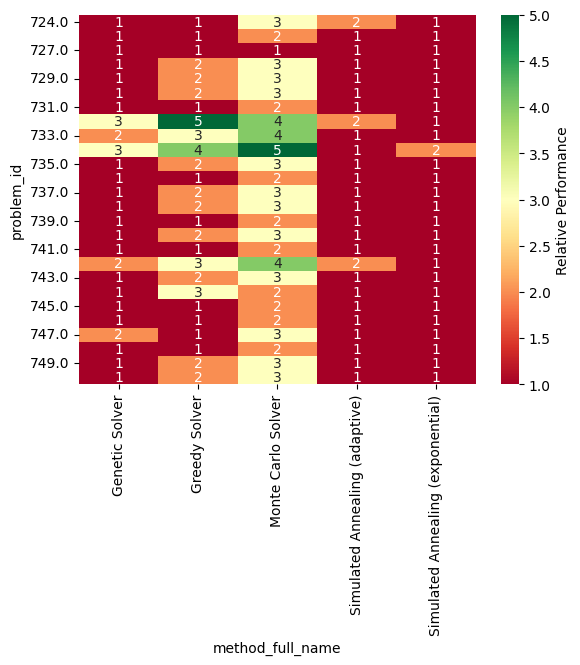

In [85]:
sns.heatmap(rank_df, annot=True, cmap='RdYlGn', cbar_kws={'label': 'Relative Performance'})
